### Ejemplo de datos para gráfica de línea

In [2]:
import pandas as pd
import numpy as np

# Generar datos
fechas = pd.date_range(start="2000-01-01", end="2025-12-31", freq="YE")
n = len(fechas)

# Generar valores aleatorios que suben con el tiempo y caen bruscamente al final
valores = {
    "Fecha": fechas,
    "Columna1": np.concatenate([
        np.sort(np.random.uniform(100, 4000, n - 5)),  # Valores ascendentes aleatorios
        np.random.uniform(500, 1000, 5)  # Caída brusca al final
    ]),
    "Columna2": np.concatenate([
        np.sort(np.random.uniform(3000, 3100, n - 5)),
        np.random.uniform(3000, 3100, 5)
    ]),
    "Columna3": np.concatenate([
        np.sort(np.random.uniform(2000, 2100, n - 5)),
        np.random.uniform(2000, 2100, 5)
    ]),
    "Columna4": np.concatenate([
        np.sort(np.random.uniform(400, 2500, n - 5)),
        np.random.uniform(50, 500, 5)
    ]),
}

# Crear DataFrame
df = pd.DataFrame(valores)

# Mostrar el DataFrame
print(df)

        Fecha     Columna1     Columna2     Columna3     Columna4
0  2000-12-31   599.872192  3000.226342  2004.296851   485.892293
1  2001-12-31   848.598778  3000.322237  2010.217214   616.355772
2  2002-12-31  1471.388484  3008.428301  2018.977659   638.931341
3  2003-12-31  1606.943211  3008.893871  2024.256319   652.929864
4  2004-12-31  1650.631879  3009.879154  2024.405598   690.286130
5  2005-12-31  1678.773876  3013.447499  2028.067431   721.928660
6  2006-12-31  1684.397350  3016.700549  2029.747075   946.787299
7  2007-12-31  1960.755460  3033.880333  2030.658022  1059.688011
8  2008-12-31  2049.464891  3034.550267  2031.300983  1074.450774
9  2009-12-31  2287.869548  3034.579770  2035.502452  1182.182015
10 2010-12-31  2430.581991  3035.416792  2037.931043  1220.279829
11 2011-12-31  2578.156928  3042.342198  2050.429687  1382.219952
12 2012-12-31  2591.558381  3057.727468  2051.691130  1386.541267
13 2013-12-31  2614.196270  3060.411199  2058.423119  1393.241889
14 2014-12

### **Código a copiar para la gráfica de línea:**

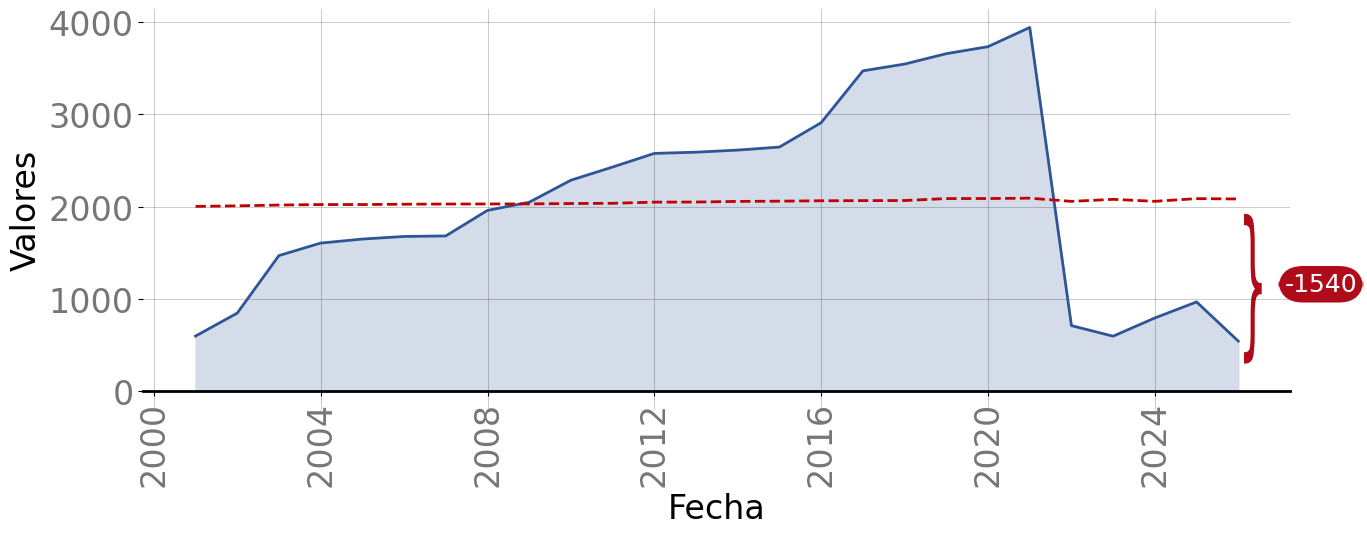

In [17]:
from pathlib import Path
import matplotlib.transforms as mtrans
from matplotlib.text import TextPath
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.font_manager as font_manager

# VARIABLES A CAMBIAR
dataframe_a_graficar = df

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))


def curly_at_fechas(x, y, width, height, ax=None, color="k"):
    """
    Dibuja una llave '{' o '}' en cualquier lugar del gráfico.

    Parámetros:
    - x: Coordenada X (puede ser una fecha o un valor numérico).
    - y: Coordenada Y.
    - width: Ancho de la llave.
    - height: Altura de la llave.
    - ax: Eje de Matplotlib donde se dibujará la llave (opcional).
    - color: Color del símbolo de la llave (por defecto es negro).
    """
    if not ax:
        ax = plt.gca()
    
    # Si x es una fecha, convertirla a un valor numérico
    if isinstance(x, pd.Timestamp):
        x = date2num(x)
    
    # Crear el símbolo de la llave con una fuente explícita
    tp = TextPath((0, 0), "}", size=1, prop=dict(family="DejaVu Sans"))
    
    # Escalar y trasladar la llave
    trans = (
        mtrans.Affine2D().scale(width, height) +
        mtrans.Affine2D().translate(x, y) +
        ax.transData
    )
    
    # Crear y añadir el PathPatch al eje con el color especificado
    pp = PathPatch(tp, lw=0, fc=color, transform=trans)
    ax.add_artist(pp)


def lineal(df, columna_fecha, columna_grafica, columna_linea, tipografia=None):
    """Genera una gráfica de área (area plot) para una columna específica de un DataFrame."""
    # Verificar que las columnas especificadas existan en el DataFrame
    if columna_fecha not in df.columns:
        raise ValueError(f"La columna '{columna_fecha}' no existe en el DataFrame.")
    if columna_grafica not in df.columns:
        raise ValueError(f"La columna '{columna_grafica}' no existe en el DataFrame.")
    if columna_linea not in df.columns:
        raise ValueError(f"La columna '{columna_linea}' no existe en el DataFrame.")
    
    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 24, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 24, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 9, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 18, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 10, 'weight': 'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }
    
    # Configurar el tamaño de la figura en píxeles
    ancho_px = 1480
    alto_px = 520
    dpi = 100  # Resolución en píxeles por pulgada
    ancho_in = ancho_px / dpi
    alto_in = alto_px / dpi
    
    # Crear la figura con el tamaño especificado
    fig, ax = plt.subplots(figsize=(ancho_in, alto_in), dpi=dpi)
    
    # Seleccionar colores específicos
    color_area = '#d4dce9'  # Primer color de la lista
    color_linea = '#2f5597'  # Segundo color de la lista
    color_linea_punteada = '#c00000'  # Color para la línea punteada
    
    # Graficar el área
    ax.fill_between(
        df[columna_fecha],
        df[columna_grafica],
        color=color_area,  # Color del área
        alpha=1.,
    )
    
    # Graficar la línea sobre el área
    ax.plot(
        df[columna_fecha],
        df[columna_grafica],
        color=color_linea,  # Color de la línea
        linewidth=2
    )
    
    # Graficar la línea punteada
    ax.plot(
        df[columna_fecha],
        df[columna_linea],
        color=color_linea_punteada,  # Color de la línea punteada
        linestyle='--',  # Estilo de línea punteada
        linewidth=2
    )
    
    # Configurar etiquetas y título
    ax.set_xlabel(columna_fecha, fontdict=font_config['eje_x'])
    ax.set_ylabel("Valores", fontdict=font_config['eje_y'])

    # Configurar las etiquetas del eje X
    ax.tick_params(axis='x', labelsize=font_config['etiquetas_eje_x']['size'], labelcolor=font_config['etiquetas_eje_x']['color'])
    ax.tick_params(axis='y', labelsize=font_config['etiquetas_eje_y']['size'], labelcolor=font_config['etiquetas_eje_y']['color'])

    # Posicionar el eje X en y=0
    ax.spines['bottom'].set_position(('data', 0))

    # Rotar las etiquetas del eje X
    plt.xticks(rotation=90)
    
    # Desactivar o activar bordes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    
    # Asignar grosor a los ejes visibles
    ax.spines['bottom'].set_linewidth(2)  # Grosor del eje inferior
    
    # Mantener las líneas del grid
    ax.grid(axis='y', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    ax.grid(axis='x', linestyle='-', color='#000000', alpha=0.2, linewidth=0.75)
    
    # Convertir la fecha 2024 a un índice o posición en el eje X
    x_pos = df["Fecha"].iloc[-1]
    y_pos_gra = df[columna_grafica].iloc[-1]
    y_pos_lin = df[columna_linea].iloc[-1]
    if y_pos_gra > y_pos_lin:
        y_pos_min = y_pos_lin
        y_pos_max = y_pos_gra
    else:   
        y_pos_min = y_pos_gra
        y_pos_max = y_pos_lin
    altura = y_pos_max - y_pos_min

    # Calcular los factores proporcionales
    x_min, x_max = ax.get_xlim()  # Obtener los límites del eje X
    y_min, y_max = ax.get_ylim()  # Obtener los límites del eje Y

    factor_ancho = 0.04 * (x_max - x_min)  # Proporcional al rango del eje X
    factor_alto = 0.05 * (y_max - y_min)   # Proporcional al rango del eje Y

    # Añadir el símbolo de la llave
    curly_at_fechas(x_pos, y_pos_min+0.2*factor_alto, width=factor_ancho, height=altura+factor_alto, ax=ax, color="#af0b19")
    
    # Calcular la diferencia entre y_pos_gra y y_pos_lin
    diferencia = round(y_pos_gra - y_pos_lin)

    # Añadir una cápsula con la diferencia en la parte derecha de la gráfica
    color_capsula = "#af0b19"  # Color de la cápsula
    bbox_props = dict(boxstyle="round,pad=0.25,rounding_size=0.99", fc=color_capsula, ec="none", alpha=1.0)

    x_pos_numeric = date2num(x_pos)  # Convertir la fecha a un número

    # Posicionar la cápsula en la parte derecha de la gráfica
    ax.text(
        x_pos_numeric + 1.8 * factor_ancho,  # Usar el valor numérico de x_pos
        y_pos_min + altura / 2.5,  # Centrar verticalmente entre y_pos_gra y y_pos_lin
        diferencia,  # Texto de la cápsula
        color="white",  # Color del texto
        fontsize=font_config['capsula_max']['size'],  # Tamaño de la fuente
        bbox=bbox_props,  # Estilo de la cápsula
        ha="center",  # Alinear horizontalmente
        va="center"   # Alinear verticalmente
    )
    
    # Guardar la gráfica como archivo SVG
    plt.savefig("linea.svg", format="svg", bbox_inches='tight', dpi=dpi)
    plt.show()

# Ejemplo de uso
lineal(dataframe_a_graficar, columna_fecha="Fecha", columna_grafica="Columna1", columna_linea="Columna3")